# Data Science and Business Analytics Internship

## Author : Supriya Gaikwad

### Task 1 : Prediction using Supervised Machine Learning

### Problem Statement : Predict the percentage of an student based on the no. of study hours. 

### Dataset used :   http://bit.ly/w-data

In [9]:
#Importing all required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [10]:
#Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data Imported Succesfully")


Data Imported Succesfully


## Analysis/Data overview

In [11]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [13]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [15]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


### From above analysis we now know that there is no null value so no need to remove any outliners

## Analysis by Visualisation

In [19]:
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

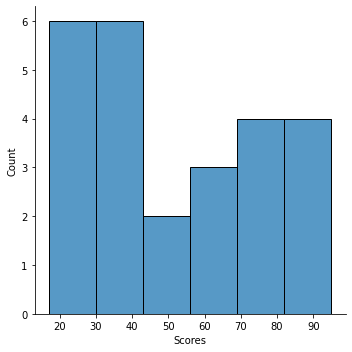

In [21]:
sns.displot(data["Scores"])
plt.show()

## Visualising how much scores and hours are correlated to each other

Text(0.5, 1.0, 'Plotting the regression line')

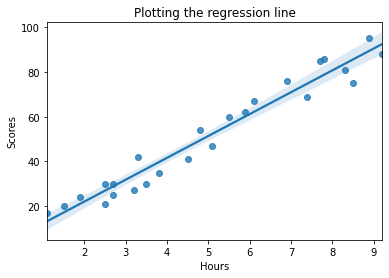

In [22]:
sns.regplot(x="Hours",y="Scores",data=data)
plt.title("Plotting the regression line")

### Here we can see that the scores and hours are strongly correlated.

## Now we used simple linear regression model to predict the data

In [24]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred = regressor.predict(x_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

## Comparing Actual vs Predicted Value

In [27]:
data1 = pd.DataFrame({'Actual':y_test,'Predicted_Score':y_pred})
data1

,Actual,Predicted_Score
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


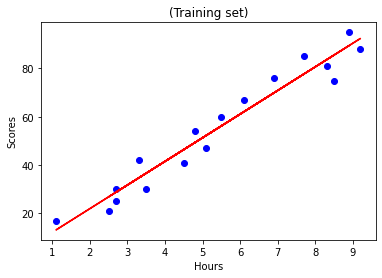

In [30]:
#Plotting the training dataset
plt.scatter(x_train,y_train,color="blue")
plt.plot(x_train,regressor.predict(x_train),color="red")
plt.title('(Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Calculating the coeffecients of the simple linear regression equation: y = C0 + C1.x(C1 is the slope and C0:is the intercept)¶

In [31]:
mean_x = np.mean(data['Hours'])
mean_y = np.mean(data['Scores'])
num = 0
den = 0
x = list(data['Hours'])
y = list(data['Scores'])
for i in range(len(data)):
    num += (x[i]-mean_x) *(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den

In [32]:
B0 = mean_y - B1*mean_x

In [35]:
data['predicted_Scores'] = B0 + B1*data['Hours']

In [36]:
data.head()

,Hours,Scores,predicted_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


[]

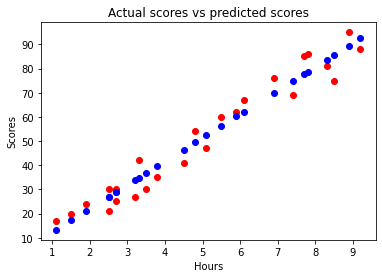

In [37]:
plt.scatter(data['Hours'],data['Scores'],c='red',label='Actual Marks')
plt.scatter(data['Hours'],data['predicted_Scores'],c='blue',label='Predicted Marks')
plt.title('Actual scores vs predicted scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot()

In [38]:
y = B0 + B1 *9.25
print("Marks scored by the student who study 9.25 hrs per day is",y)

Marks scored by the student who study 9.25 hrs per day is 92.90985477015732


## Categorising the students who either passed or failed

In [39]:
#assuming cut_off marks be 40
cut_off = 40
data['Result'] = data['Scores']>=cut_off
data

,Hours,Scores,predicted_Scores,Result
0,2.5,21,26.923182,False
1,5.1,47,52.340271,True
2,3.2,27,33.766244,False
3,8.5,75,85.578002,True
4,3.5,30,36.698985,False
5,1.5,20,17.147378,False
6,9.2,88,92.421065,True
7,5.5,60,56.250592,True
8,8.3,81,83.622842,True
9,2.7,25,28.878343,False


In [40]:
data["Result"] = data["Result"].astype(str)
data.Result = data.Result.replace({"True":"Passed","False":"Failed"})
data

,Hours,Scores,predicted_Scores,Result
0,2.5,21,26.923182,Failed
1,5.1,47,52.340271,Passed
2,3.2,27,33.766244,Failed
3,8.5,75,85.578002,Passed
4,3.5,30,36.698985,Failed
5,1.5,20,17.147378,Failed
6,9.2,88,92.421065,Passed
7,5.5,60,56.250592,Passed
8,8.3,81,83.622842,Passed
9,2.7,25,28.878343,Failed


In [41]:
data["Result"].value_counts()

Passed    15
Failed    10
Name: Result, dtype: int64

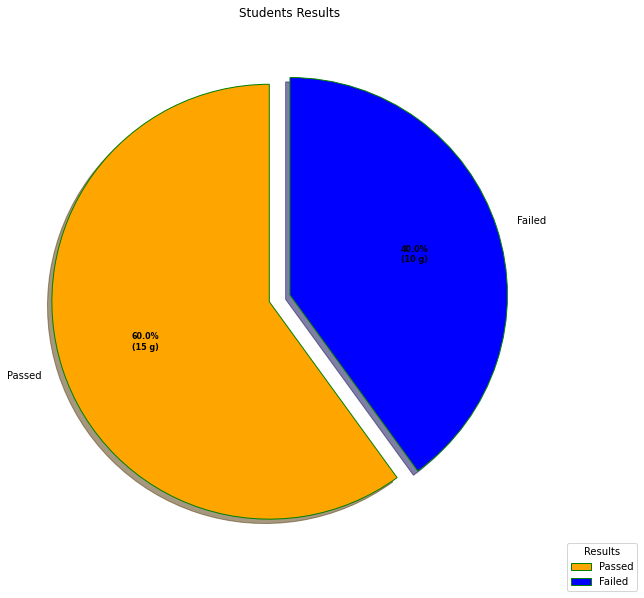

In [42]:
Results = ['Passed', 'Failed']
data = [15,10]
explode = (0.1, 0.0)
colors = ( "orange", "blue")


wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(15, 10)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = Results, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, Results, 
          title ="Results", 
          loc ="center left", 
          bbox_to_anchor =(1, 0)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Students Results") 
  
# show plot 
plt.show()